In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
#SPECIFY EACH PATH

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [4]:
#Set number of classes

In [5]:
NUM_CLASSES = 16

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 16)                176       
                                                                 
Total params: 1246 (4.87 KB)
Trainable params: 1246 (4.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


37/37 [==============================] - ETA: 0s - loss: 2.8003 - accuracy: 0.0929
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 3s 18ms/step - loss: 2.8003 - accuracy: 0.0929 - val_loss: 2.6666 - val_accuracy: 0.1529
Epoch 2/1000
21/37 [================>.............] - ETA: 0s - loss: 2.6900 - accuracy: 0.1376

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 5ms/step - loss: 2.6762 - accuracy: 0.1415 - val_loss: 2.5945 - val_accuracy: 0.1859
Epoch 3/1000
23/37 [=================>............] - ETA: 0s - loss: 2.6145 - accuracy: 0.1332
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 2.6010 - accuracy: 0.1417 - val_loss: 2.5088 - val_accuracy: 0.1846
Epoch 4/1000
28/37 [=====================>........] - ETA: 0s - loss: 2.5315 - accuracy: 0.1655
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 5ms/step - loss: 2.5178 - accuracy: 0.1714 - val_loss: 2.4120 - val_accuracy: 0.2240
Epoch 5/1000
28/37 [=====================>........] - ETA: 0s - loss: 2.4376 - accuracy: 0.1836
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [=============

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.8223


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 167ms/step
[1.5825616e-10 4.5471366e-02 2.2344872e-04 8.0994716e-05 6.7892842e-14
 3.6645988e-01 4.0753520e-08 1.4339691e-06 1.0281012e-09 5.7834483e-18
 2.3818128e-10 1.0818865e-02 5.0305042e-02 8.0819607e-02 4.8841156e-14
 4.4581923e-01]
15


# Confusion matrix

50/50 [==============================] - 0s 1ms/step


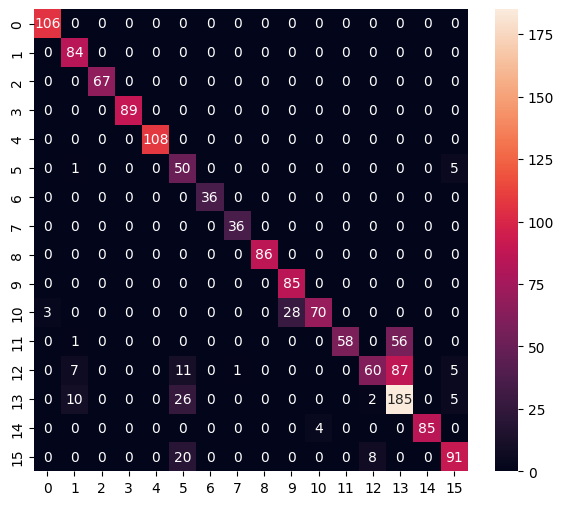

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       0.82      1.00      0.90        84
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00       108
           5       0.47      0.89      0.61        56
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      1.00      1.00        86
           9       0.75      1.00      0.86        85
          10       0.95      0.69      0.80       101
          11       1.00      0.50      0.67       115
          12       0.86      0.35      0.50       171
          13       0.56      0.81      0.67       228
          14       1.00      0.96      0.98        89
          15       0.86      0.76      0.81       119

    accuracy                           0.82      1576
   m

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MSI\AppData\Local\Temp\tmpc73yfp7e\assets


INFO:tensorflow:Assets written to: C:\Users\MSI\AppData\Local\Temp\tmpc73yfp7e\assets


7072

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5825564e-10 4.5471329e-02 2.2344866e-04 8.0994760e-05 6.7892618e-14
 3.6645979e-01 4.0753548e-08 1.4339702e-06 1.0280978e-09 5.7834297e-18
 2.3818145e-10 1.0818861e-02 5.0305061e-02 8.0819637e-02 4.8841278e-14
 4.4581953e-01]
15
